In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
import requests
import json
from pandas.io.json import json_normalize

In [3]:
df = pd.read_csv('C:/Users/pbv01/Desktop/COVID Project/COVID Tracking Project/daily (1).csv',parse_dates=True,date_parser=True)

In [4]:
df = df[['date', 'state',
    'positive', 
    'negative', 
    'pending', 
    'dataQualityGrade', 
    'lastUpdateEt', 
    'dateModified',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable',
       'positiveIncrease', 'negativeIncrease', 'total', 'totalTestResults',
       'totalTestResultsIncrease']]

In [5]:
df.head()

,date,state,positive,negative,pending,dataQualityGrade,lastUpdateEt,dateModified,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease
0,20200724,FL,402312,2874324,2727.0,A,7/23/2020 23:59,2020-07-23T23:59:00Z,4166644.0,502625.0,3649517.0,402312.0,5768.0,NaN,12444,53250,3279363,3276636,65694
1,20200723,FL,389868,2821074,2626.0,A,7/22/2020 23:59,2020-07-22T23:59:00Z,4075056.0,486782.0,3574573.0,389868.0,5632.0,NaN,10249,45982,3213568,3210942,56231
2,20200722,FL,379619,2775092,2524.0,A,7/21/2020 23:59,2020-07-21T23:59:00Z,3993867.0,473128.0,3507785.0,379619.0,5459.0,NaN,9785,45176,3157235,3154711,54961
3,20200721,FL,369834,2729916,2462.0,A,7/20/2020 23:59,2020-07-20T23:59:00Z,3912910.0,460918.0,3439642.0,369834.0,5319.0,NaN,9440,38204,3102212,3099750,47644
4,20200720,FL,360394,2691712,2391.0,A,7/19/2020 23:59,2020-07-19T23:59:00Z,3845270.0,448764.0,3384679.0,360394.0,5183.0,NaN,10347,39118,3054497,3052106,49465


In [6]:
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')

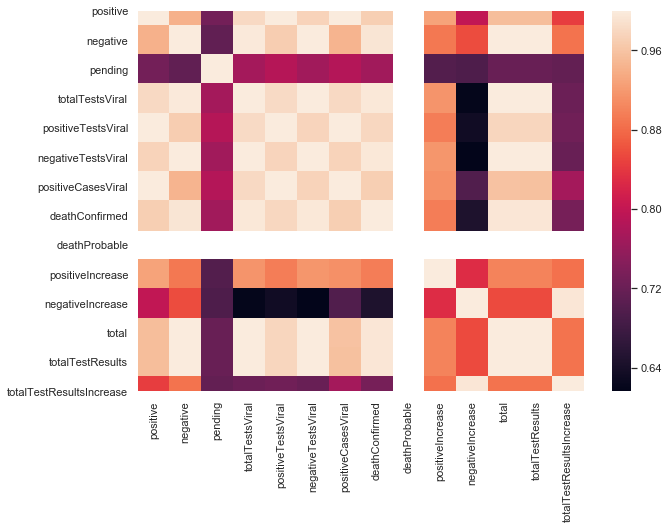

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), fmt='.1g')

In [8]:
df1 = df[['date','positive','negative','pending']]

In [9]:
df1 = df1.melt(id_vars='date').rename(columns=str.title)

In [10]:
df1.head()

,Date,Variable,Value
0,2020-07-24,positive,402312.0
1,2020-07-23,positive,389868.0
2,2020-07-22,positive,379619.0
3,2020-07-21,positive,369834.0
4,2020-07-20,positive,360394.0


C:\Users\pbv01\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Results')

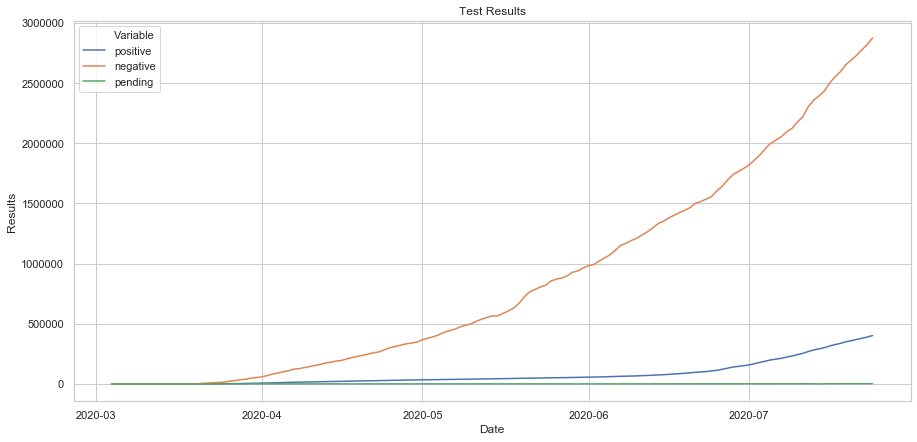

In [11]:
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(x='Date', y='Value', hue='Variable', data=df1)
#sns.despine(fig)

ax.set_title('Test Results')
ax.set_ylabel('Results')

In [12]:
df1.to_csv (r'C:\Users\pbv01\Desktop\testing.csv', index = False, header=True)